In [5]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

import urllib.request

from PIL import Image
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [6]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("data/train.csv")

In [7]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


*No hay nulos*

laptop_ID -> code de l'ordinateur portable

Company -> nom du constructeur de l'ordinateur portable

Product -> nom du produit

TypeName -> type d'ordinateur portable

Inches -> pouces de l'écran

ScreenResolution -> résolution de l'écran et technologie, par exemple hd, full hd, retina, etc.

Cpu -> microprocesseur et vitesse

Ram -> quantité de mémoire RAM

Memory -> lecteurs de mémoire pour sauvegarder les fichiers et technologie comme 240 gb ssd.

Gpu -> processeur graphique, intégré ou dédié.

OpSys -> système opérationnel fonctionnant dans l'ordinateur

Weight -> poids de l'ordinateur

**Price_in_euros** -> prix en euros

*Hay ruido en las variables, es decir mucha informacion que igual no me interesa ahora...*  
Por ejemplo: hay informacion cruzada con texto y numero..
Vamos a tener que limpiar. A l'attaque.



In [9]:
target = "Price_in_euros"

In [10]:
## quitamos gb y kg de Ram y wight y convertimos estas variables en numericas

df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float64')

In [11]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    int32  
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    float64
 12  Price_in_euros    912 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 89.2+ KB


*Bien, se han cambiado....seguimos con la columna **ScreenResolution**, que contiene informacion sobre la pantalla (Touchscreen, Full HD,...), los pixeles (1920x1080,...) y el IPS.*

In [13]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                349
1366x768                                         211
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         32
Full HD / Touchscreen 1920x1080                   30
1600x900                                          14
Quad HD+ / Touchscreen 3200x1800                  11
Touchscreen 1366x768                              11
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel 4K Ultra HD 3840x2160                    5
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2560x1600                 5
1440x900                                           4
IPS Panel 1366x768                                 4
IPS Panel Retina Display 2304x1440                 4
IPS Panel Touchscreen 2560x14

In [14]:
df.ScreenResolution.str.contains('ips', case=False).value_counts()

ScreenResolution
False    661
True     251
Name: count, dtype: int64

In [15]:
#añadir una columna 'ips'
df['ips'] = df.ScreenResolution.str.contains('IPS', case=False)

In [16]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ips
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,False
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,False
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00,False
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,False
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00,False
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00,False
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00,False
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.00,False


In [17]:
df.ScreenResolution.str.contains('touch', case=False).value_counts()

ScreenResolution
False    781
True     131
Name: count, dtype: int64

In [18]:
#añadimos una columna 'touchscreen'
df['touchscreen'] = df.ScreenResolution.str.contains('touch', case=False)

In [19]:
#añadimos una columna 'resolution' con la resolucion en pxl
df['resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
 #   \d+: Busca uno o más dígitos.
#    x: Coincide literalmente con el carácter "x".
 #   \d+: Busca uno o más dígitos nuevamente.

In [20]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,False,False,1920x1080
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,False,False,1920x1080
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00,False,False,1920x1080
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,False,False,1440x900
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,False,False,1920x1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00,False,False,1920x1080
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00,False,True,1920x1080
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00,False,False,1920x1080
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.00,False,False,1366x768


In [21]:
df.resolution.value_counts()

resolution
1920x1080    577
1366x768     228
3840x2160     26
3200x1800     21
2560x1440     18
1600x900      14
2560x1600      5
2256x1504      5
1440x900       4
2304x1440      4
1920x1200      3
2880x1800      3
2160x1440      2
2400x1600      2
Name: count, dtype: int64

In [22]:
# Crear la nueva columna "res_screen" que precisa si la pantalla es HD o Full HD o 4K Ultra HD o Ultra HD o Quad HD+.

df['res_screen'] = df['ScreenResolution'].apply(lambda x: '4K Ultra HD' if '4K Ultra HD' in x else ('Quad HD+' if 'Quad HD+' in x else('Full HD' if 'Full HD' in x else ('Ultra HD' if 'Ultra HD' in x else ('HD' if 'HD' in x else 'NA')))))


In [23]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution,res_screen
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,False,False,1920x1080,Full HD
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,False,False,1920x1080,Full HD
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00,False,False,1920x1080,Full HD
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,False,False,1440x900,NA
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,False,False,1920x1080,Full HD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00,False,False,1920x1080,Full HD
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00,False,True,1920x1080,Full HD
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00,False,False,1920x1080,Full HD
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.00,False,False,1366x768,NA


In [24]:
df.res_screen.value_counts()

res_screen
Full HD        579
NA             283
4K Ultra HD     26
Quad HD+        24
Name: count, dtype: int64

In [25]:
df.Memory.value_counts()

Memory
256GB SSD                        282
1TB HDD                          152
500GB HDD                         92
512GB SSD                         83
128GB SSD +  1TB HDD              67
128GB SSD                         54
256GB SSD +  1TB HDD              52
32GB Flash Storage                33
1TB SSD                           12
64GB Flash Storage                11
512GB SSD +  1TB HDD               8
2TB HDD                            8
256GB Flash Storage                7
16GB Flash Storage                 6
256GB SSD +  2TB HDD               6
32GB SSD                           5
1.0TB Hybrid                       5
128GB Flash Storage                4
180GB SSD                          3
16GB SSD                           3
512GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
1TB HDD +  1TB HDD                 1
512GB Flash Storage                1
1.0TB HDD                          1
256GB SSD +  500GB HDD             1
8GB SSD                        

In [26]:
# añadimos una columna 'memory_1' y otra 'memory_1', que diferencian sobre memoria flash y sobre disco duro
df['memory_1'] = df['Memory'].str.split("+").str[0]
df['memory_2'] = df['Memory'].str.split("+").str[1]

In [27]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution,res_screen,memory_1,memory_2
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,False,False,1920x1080,Full HD,256GB SSD,NaN
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,False,False,1920x1080,Full HD,1TB HDD,NaN
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00,False,False,1920x1080,Full HD,1TB HDD,NaN
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,False,False,1440x900,NA,128GB Flash Storage,NaN
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,False,False,1920x1080,Full HD,1TB HDD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00,False,False,1920x1080,Full HD,256GB SSD,NaN
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00,False,True,1920x1080,Full HD,256GB SSD,NaN
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00,False,False,1920x1080,Full HD,2TB HDD,NaN
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.00,False,False,1366x768,NA,500GB HDD,NaN


In [28]:
# diferenciamos entre SSD y HDD para los 2 tipos de memoria.
df['memory_1_type'] = df['memory_1'].apply(lambda x: 'SSD' if 'SSD' in str(x) else 'HDD')
df['memory_2_type'] = df['memory_2'].apply(lambda x: 'Unknown' if pd.isnull(x) else ('SSD' if 'SSD' in str(x) else 'HDD'))


In [29]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_in_euros,ips,touchscreen,resolution,res_screen,memory_1,memory_2,memory_1_type,memory_2_type
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,...,1.86,539.00,False,False,1920x1080,Full HD,256GB SSD,NaN,SSD,Unknown
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,...,2.59,879.01,False,False,1920x1080,Full HD,1TB HDD,NaN,HDD,Unknown
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,...,2.04,900.00,False,False,1920x1080,Full HD,1TB HDD,NaN,HDD,Unknown
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,1.34,898.94,False,False,1440x900,NA,128GB Flash Storage,NaN,HDD,Unknown
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,...,2.25,428.00,False,False,1920x1080,Full HD,1TB HDD,NaN,HDD,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,...,2.20,800.00,False,False,1920x1080,Full HD,256GB SSD,NaN,SSD,Unknown
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,...,1.48,1629.00,False,True,1920x1080,Full HD,256GB SSD,NaN,SSD,Unknown
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,...,2.20,519.00,False,False,1920x1080,Full HD,2TB HDD,NaN,HDD,Unknown
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,...,1.86,258.00,False,False,1366x768,NA,500GB HDD,NaN,HDD,Unknown


In [30]:
# nos quedamos solo con el valor numerico de la memoria en ambos tipo de memoria
df['memory_1'] = df['memory_1'].str.strip()
df['memory_1'] = df['memory_1'].str.split(" ").str[0]

df['memory_2'] = df['memory_2'].str.strip()
df['memory_2'] = df['memory_2'].str.split(" ").str[0]

In [31]:
#para poner todo en una misma escala
df['memory_1'] = df['memory_1'].replace({'1TB' : '1000GB', '1.0TB' : '1000GB', '2TB' : '2000GB' }) 
df['memory_2'] = df['memory_2'].replace({'1TB' : '1000GB', '1.0TB' : '1000GB', '2TB' : '2000GB' }) 

In [32]:
df['memory_1'] = df['memory_1'].replace('GB', '', regex=True).fillna(0).astype(int) # regex=True para no perder nada, Como "respeter la casse ou pas" en Word
df['memory_2'] = df['memory_2'].replace('GB', '', regex=True).fillna(0).astype(int)

In [33]:
df['memory_2'] = df['memory_2'].fillna("0")
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_in_euros,ips,touchscreen,resolution,res_screen,memory_1,memory_2,memory_1_type,memory_2_type
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,...,1.86,539.00,False,False,1920x1080,Full HD,256,0,SSD,Unknown
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,...,2.59,879.01,False,False,1920x1080,Full HD,1000,0,HDD,Unknown
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,...,2.04,900.00,False,False,1920x1080,Full HD,1000,0,HDD,Unknown
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,1.34,898.94,False,False,1440x900,NA,128,0,HDD,Unknown
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,...,2.25,428.00,False,False,1920x1080,Full HD,1000,0,HDD,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,...,2.20,800.00,False,False,1920x1080,Full HD,256,0,SSD,Unknown
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,...,1.48,1629.00,False,True,1920x1080,Full HD,256,0,SSD,Unknown
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,...,2.20,519.00,False,False,1920x1080,Full HD,2000,0,HDD,Unknown
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,...,1.86,258.00,False,False,1366x768,NA,500,0,HDD,Unknown


In [34]:
df.OpSys.value_counts()

OpSys
Windows 10      741
Linux            48
No OS            44
Windows 7        29
Chrome OS        24
macOS            11
Windows 10 S      7
Mac OS X          6
Android           2
Name: count, dtype: int64

*Pasamos las versiones de windows a 'windows', "Mac OS X" a 'macOS'*

In [35]:
df['OpSys'] = df['OpSys'].replace({'Windows 10' : 'Windows', 'Windows 10 S' : 'Windows', 'Windows 7' : 'Windows', 'Mac OS X' : 'macOS' }) 

In [36]:
df.OpSys.value_counts()

OpSys
Windows      777
Linux         48
No OS         44
Chrome OS     24
macOS         17
Android        2
Name: count, dtype: int64

*Le toca ahora a "Cpu"*:

In [37]:
#coger el ultimo elemento de 'Cpu'
df['Cpu_Speed'] = df['Cpu'].str.split().str[-1]

#quitamos 'GHz'
df['Cpu_Speed'] = df['Cpu_Speed'].str.replace("GHz", '')

In [38]:
df['Cpu_Speed'] = df.Cpu_Speed.astype(float)

In [39]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              124
Intel Core i7 7700HQ 2.8GHz             105
Intel Core i7 7500U 2.7GHz               97
Intel Core i5 8250U 1.6GHz               52
Intel Core i7 8550U 1.8GHz               47
                                       ... 
AMD E-Series 9000e 1.5GHz                 1
Intel Core i7 6560U 2.2GHz                1
Intel Core i5 6440HQ 2.6GHz               1
AMD E-Series E2-6110 1.5GHz               1
Intel Pentium Dual Core N4200 1.1GHz      1
Name: count, Length: 107, dtype: int64

*Nos interesa también el tipo de procesor asi que vamos a crear otro columna con esta informacion*:

In [40]:
def tipo_procesor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name.startswith('Intel Core i'):
        return cpu_name
    elif x.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

df['Cpu_brand'] = df['Cpu'].apply(tipo_procesor)

In [41]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,ips,touchscreen,resolution,res_screen,memory_1,memory_2,memory_1_type,memory_2_type,Cpu_Speed,Cpu_brand
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,...,False,False,1920x1080,Full HD,256,0,SSD,Unknown,2.0,Intel Core i3
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,...,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.6,Intel Core i7
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,...,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.7,Intel Core i7
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,False,False,1440x900,NA,128,0,HDD,Unknown,1.8,Intel Core i5
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,...,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.0,Intel Core i3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,...,False,False,1920x1080,Full HD,256,0,SSD,Unknown,1.6,Intel Core i5
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,...,False,True,1920x1080,Full HD,256,0,SSD,Unknown,2.4,Intel Core i5
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,...,False,False,1920x1080,Full HD,2000,0,HDD,Unknown,2.5,Intel Core i5
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,...,False,False,1366x768,NA,500,0,HDD,Unknown,1.5,AMD Processor


In [42]:
df.Cpu_brand.value_counts()

Cpu_brand
Intel Core i7            374
Intel Core i5            282
Other Intel Processor    121
Intel Core i3             93
AMD Processor             42
Name: count, dtype: int64

In [43]:
# Suprimir las columnas "ScreenResolution", "Cpu" y "Memory" porque las he tratado
df.drop(columns=['ScreenResolution', 'Cpu', 'Memory'], inplace=True)

In [44]:
df

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution,res_screen,memory_1,memory_2,memory_1_type,memory_2_type,Cpu_Speed,Cpu_brand
0,755,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 520,Windows,1.86,539.00,False,False,1920x1080,Full HD,256,0,SSD,Unknown,2.0,Intel Core i3
1,618,Dell,Inspiron 7559,Gaming,15.6,16,Nvidia GeForce GTX 960<U+039C>,Windows,2.59,879.01,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.6,Intel Core i7
2,909,HP,ProBook 450,Notebook,15.6,8,Nvidia GeForce 930MX,Windows,2.04,900.00,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.7,Intel Core i7
3,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,False,False,1440x900,NA,128,0,HDD,Unknown,1.8,Intel Core i5
4,286,Dell,Inspiron 3567,Notebook,15.6,4,AMD Radeon R5 M430,Linux,2.25,428.00,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.0,Intel Core i3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,8,AMD Radeon 530,Windows,2.20,800.00,False,False,1920x1080,Full HD,256,0,SSD,Unknown,1.6,Intel Core i5
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,8,Intel HD Graphics 520,Windows,1.48,1629.00,False,True,1920x1080,Full HD,256,0,SSD,Unknown,2.4,Intel Core i5
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,8,Intel HD Graphics 620,No OS,2.20,519.00,False,False,1920x1080,Full HD,2000,0,HDD,Unknown,2.5,Intel Core i5
910,23,HP,255 G6,Notebook,15.6,4,AMD Radeon R2,No OS,1.86,258.00,False,False,1366x768,NA,500,0,HDD,Unknown,1.5,AMD Processor


In [45]:
df.Product.value_counts()

Product
XPS 13                                        23
Inspiron 3567                                 22
Legion Y520-15IKBN                            15
Vostro 3568                                   14
250 G6                                        13
                                              ..
15-AY023na (N3710/8GB/2TB/W10)                 1
R558UA-DM966T (i5-7200U/8GB/128GB/FHD/W10)     1
Precision 3510                                 1
Pavilion X360                                  1
GL62M 7RD                                      1
Name: count, Length: 480, dtype: int64

*No voy a tocar esta columna*

In [46]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620       185
Intel HD Graphics 520       125
Intel UHD Graphics 620       52
Nvidia GeForce GTX 1050      48
Nvidia GeForce 940MX         31
                           ... 
AMD Radeon R7 M365X           1
Nvidia GeForce GTX 980        1
Nvidia GeForce GTX 960        1
AMD Radeon R5 430             1
Nvidia GeForce GTX 1070M      1
Name: count, Length: 93, dtype: int64

*Nos quedamos con el nivel de informacion siguiente: Marca, que es: Intel o Nvidia o Radeon*

In [47]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x: 'intel' if 'intel' in x.lower() else ('amd' if 'amd' in x.lower() else 'nvidia'))

In [48]:
df

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_in_euros,...,touchscreen,resolution,res_screen,memory_1,memory_2,memory_1_type,memory_2_type,Cpu_Speed,Cpu_brand,Gpu_brand
0,755,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 520,Windows,1.86,539.00,...,False,1920x1080,Full HD,256,0,SSD,Unknown,2.0,Intel Core i3,intel
1,618,Dell,Inspiron 7559,Gaming,15.6,16,Nvidia GeForce GTX 960<U+039C>,Windows,2.59,879.01,...,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.6,Intel Core i7,nvidia
2,909,HP,ProBook 450,Notebook,15.6,8,Nvidia GeForce 930MX,Windows,2.04,900.00,...,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.7,Intel Core i7,nvidia
3,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,...,False,1440x900,NA,128,0,HDD,Unknown,1.8,Intel Core i5,intel
4,286,Dell,Inspiron 3567,Notebook,15.6,4,AMD Radeon R5 M430,Linux,2.25,428.00,...,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.0,Intel Core i3,amd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,8,AMD Radeon 530,Windows,2.20,800.00,...,False,1920x1080,Full HD,256,0,SSD,Unknown,1.6,Intel Core i5,amd
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,8,Intel HD Graphics 520,Windows,1.48,1629.00,...,True,1920x1080,Full HD,256,0,SSD,Unknown,2.4,Intel Core i5,intel
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,8,Intel HD Graphics 620,No OS,2.20,519.00,...,False,1920x1080,Full HD,2000,0,HDD,Unknown,2.5,Intel Core i5,intel
910,23,HP,255 G6,Notebook,15.6,4,AMD Radeon R2,No OS,1.86,258.00,...,False,1366x768,NA,500,0,HDD,Unknown,1.5,AMD Processor,amd


In [49]:
df_clean = df.drop(['Gpu'], axis=1).reset_index().drop('index', axis=1)

In [50]:
df_clean

,laptop_ID,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution,res_screen,memory_1,memory_2,memory_1_type,memory_2_type,Cpu_Speed,Cpu_brand,Gpu_brand
0,755,HP,250 G6,Notebook,15.6,8,Windows,1.86,539.00,False,False,1920x1080,Full HD,256,0,SSD,Unknown,2.0,Intel Core i3,intel
1,618,Dell,Inspiron 7559,Gaming,15.6,16,Windows,2.59,879.01,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.6,Intel Core i7,nvidia
2,909,HP,ProBook 450,Notebook,15.6,8,Windows,2.04,900.00,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.7,Intel Core i7,nvidia
3,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,False,False,1440x900,NA,128,0,HDD,Unknown,1.8,Intel Core i5,intel
4,286,Dell,Inspiron 3567,Notebook,15.6,4,Linux,2.25,428.00,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.0,Intel Core i3,amd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,8,Windows,2.20,800.00,False,False,1920x1080,Full HD,256,0,SSD,Unknown,1.6,Intel Core i5,amd
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,8,Windows,1.48,1629.00,False,True,1920x1080,Full HD,256,0,SSD,Unknown,2.4,Intel Core i5,intel
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,8,No OS,2.20,519.00,False,False,1920x1080,Full HD,2000,0,HDD,Unknown,2.5,Intel Core i5,intel
910,23,HP,255 G6,Notebook,15.6,4,No OS,1.86,258.00,False,False,1366x768,NA,500,0,HDD,Unknown,1.5,AMD Processor,amd


In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   laptop_ID       912 non-null    int64  
 1   Company         912 non-null    object 
 2   Product         912 non-null    object 
 3   TypeName        912 non-null    object 
 4   Inches          912 non-null    float64
 5   Ram             912 non-null    int32  
 6   OpSys           912 non-null    object 
 7   Weight          912 non-null    float64
 8   Price_in_euros  912 non-null    float64
 9   ips             912 non-null    bool   
 10  touchscreen     912 non-null    bool   
 11  resolution      912 non-null    object 
 12  res_screen      912 non-null    object 
 13  memory_1        912 non-null    int32  
 14  memory_2        912 non-null    int32  
 15  memory_1_type   912 non-null    object 
 16  memory_2_type   912 non-null    object 
 17  Cpu_Speed       912 non-null    flo

In [52]:
df_clean

,laptop_ID,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution,res_screen,memory_1,memory_2,memory_1_type,memory_2_type,Cpu_Speed,Cpu_brand,Gpu_brand
0,755,HP,250 G6,Notebook,15.6,8,Windows,1.86,539.00,False,False,1920x1080,Full HD,256,0,SSD,Unknown,2.0,Intel Core i3,intel
1,618,Dell,Inspiron 7559,Gaming,15.6,16,Windows,2.59,879.01,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.6,Intel Core i7,nvidia
2,909,HP,ProBook 450,Notebook,15.6,8,Windows,2.04,900.00,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.7,Intel Core i7,nvidia
3,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,False,False,1440x900,NA,128,0,HDD,Unknown,1.8,Intel Core i5,intel
4,286,Dell,Inspiron 3567,Notebook,15.6,4,Linux,2.25,428.00,False,False,1920x1080,Full HD,1000,0,HDD,Unknown,2.0,Intel Core i3,amd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,28,Dell,Inspiron 5570,Notebook,15.6,8,Windows,2.20,800.00,False,False,1920x1080,Full HD,256,0,SSD,Unknown,1.6,Intel Core i5,amd
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,8,Windows,1.48,1629.00,False,True,1920x1080,Full HD,256,0,SSD,Unknown,2.4,Intel Core i5,intel
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,8,No OS,2.20,519.00,False,False,1920x1080,Full HD,2000,0,HDD,Unknown,2.5,Intel Core i5,intel
910,23,HP,255 G6,Notebook,15.6,4,No OS,1.86,258.00,False,False,1366x768,NA,500,0,HDD,Unknown,1.5,AMD Processor,amd


## Distribucion de la target:

<Axes: xlabel='Price_in_euros', ylabel='Count'>

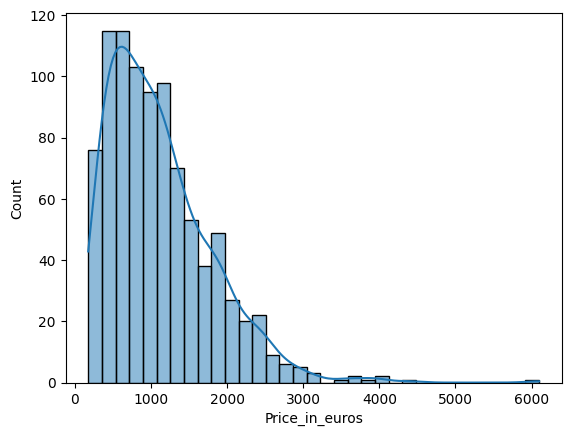

In [53]:
sns.histplot(df_clean[target], kde = True)

 #### no tiene distribucion normal, hay que normalizarla  (Ojo: de momento no la tocamos porque parece que nos da peores resultados

In [54]:
#def apply_log_normalization(dataset, columns):
#    for column in columns:
#        dataset[column] = np.log(dataset[column] + 1)  # Agregar 1 para evitar log(0)
#    return dataset

# Definir las columnas a normalizar
#columns_to_normalize = ['Price_in_euros']

In [55]:
df_clean_copy = df_clean.copy()

In [56]:
#df_clean_copy = apply_log_normalization(df_clean_copy, columns_to_normalize)

<Axes: >

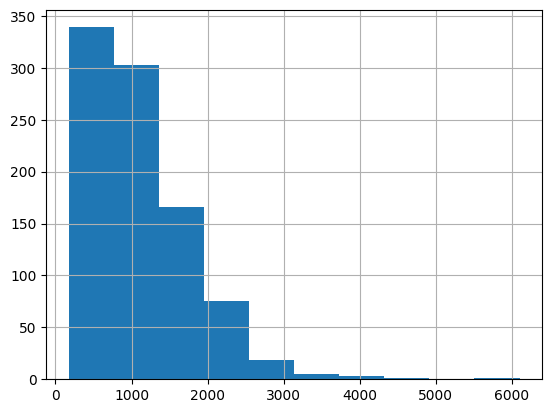

In [57]:
df_clean_copy[target].hist()

*Nice!*

# MiniEDA

In [58]:
features_cat = df_clean_copy.select_dtypes(include = "object").columns.to_list()
if target in features_cat:
    features_cat.remove(target)
features_cat

['Company',
 'Product',
 'TypeName',
 'OpSys',
 'resolution',
 'res_screen',
 'memory_1_type',
 'memory_2_type',
 'Cpu_brand',
 'Gpu_brand']

In [59]:
features_num = [col for col in df_clean_copy.columns if col not in features_cat and col != target and df_clean_copy[col].dtype != 'bool']
features_num

['laptop_ID', 'Inches', 'Ram', 'Weight', 'memory_1', 'memory_2', 'Cpu_Speed']

<Figure size 800x600 with 0 Axes>

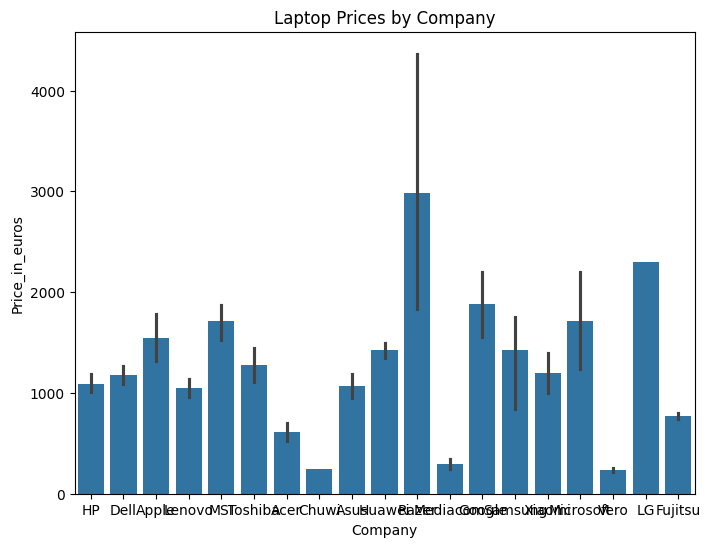

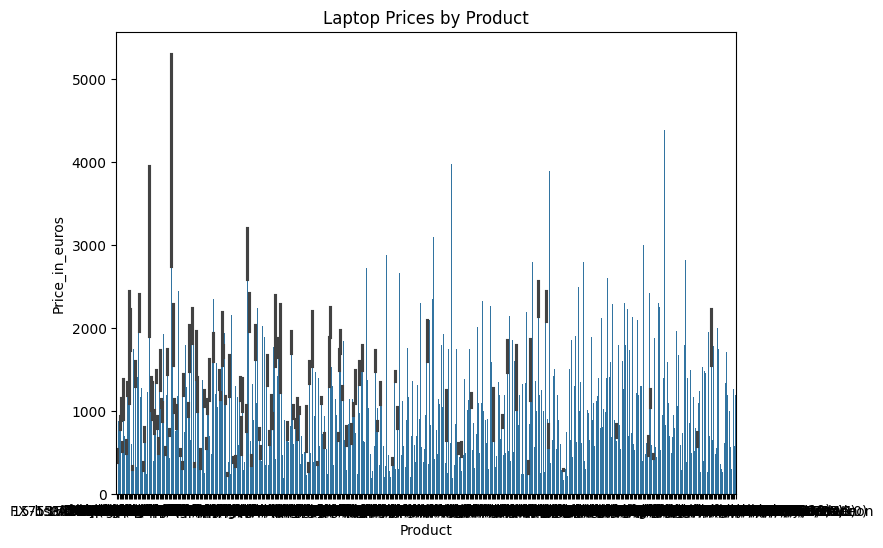

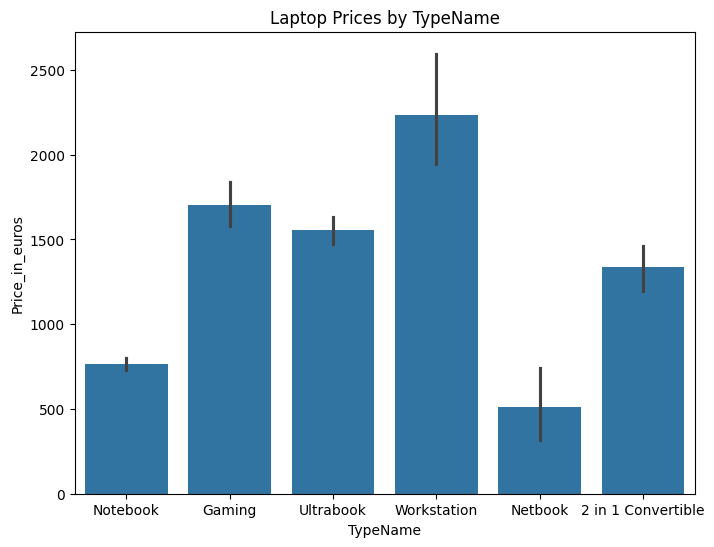

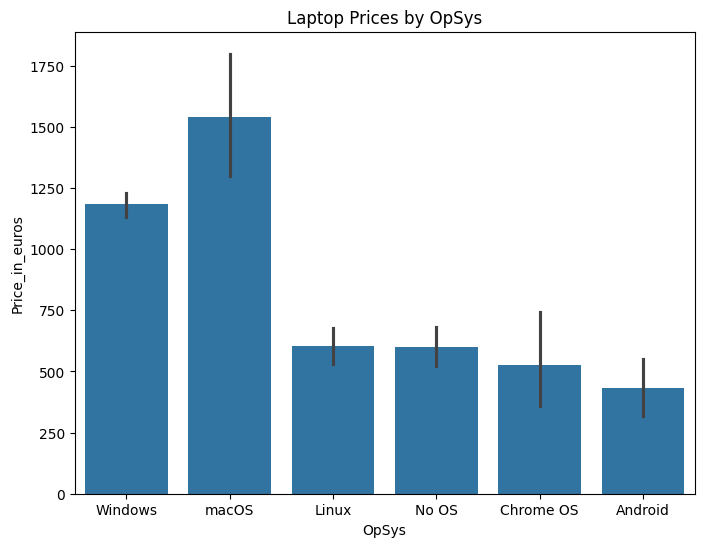

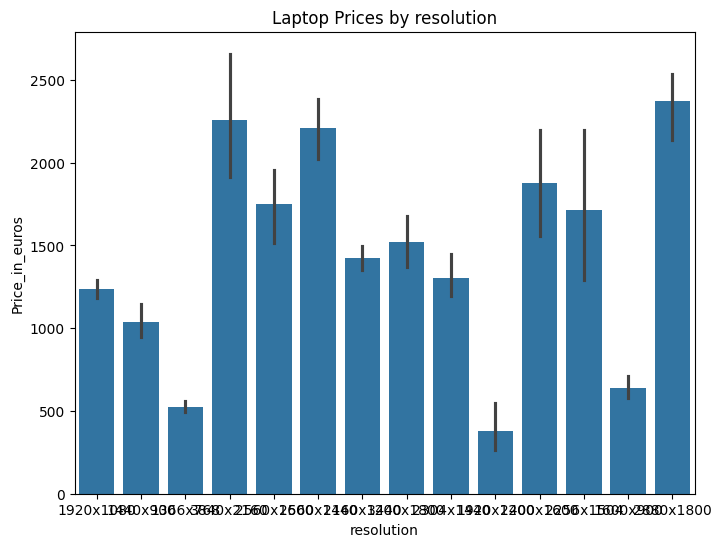

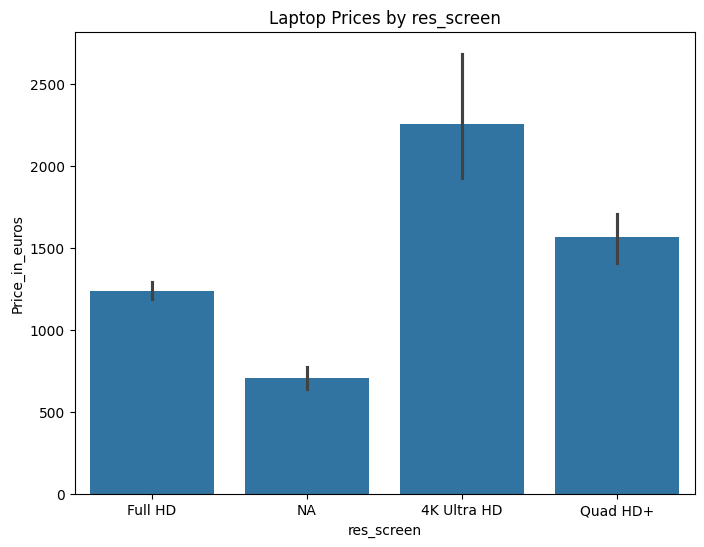

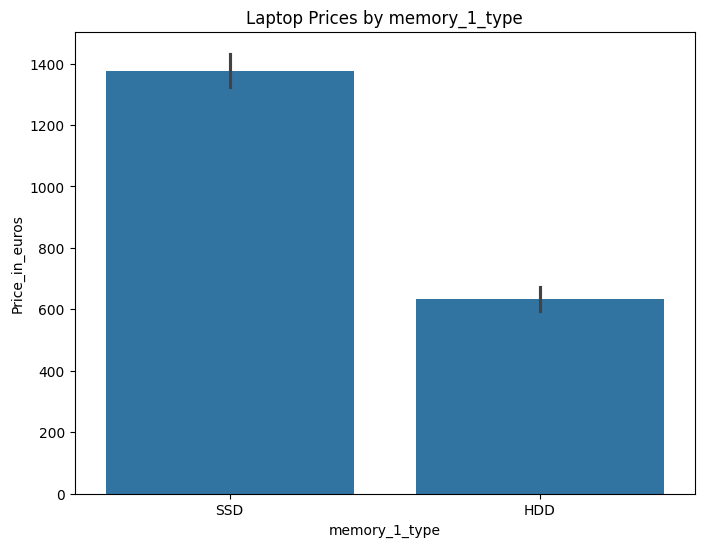

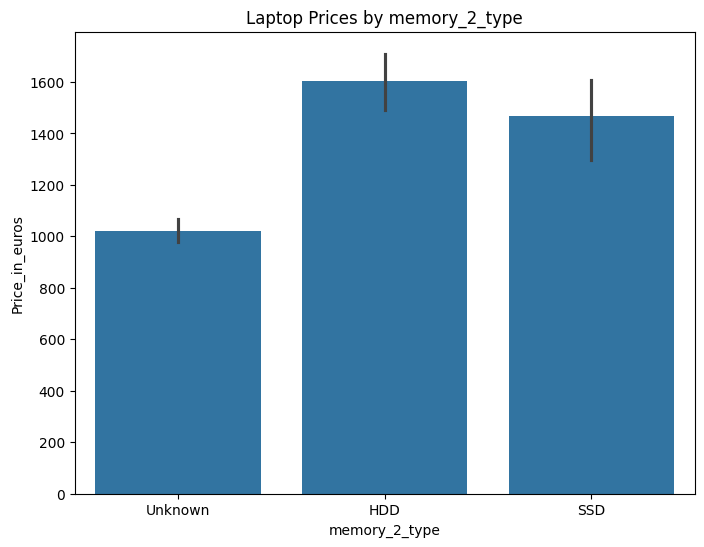

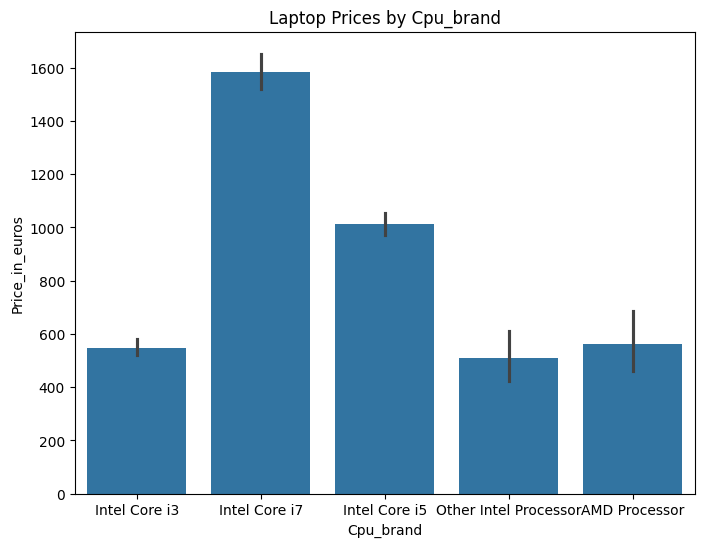

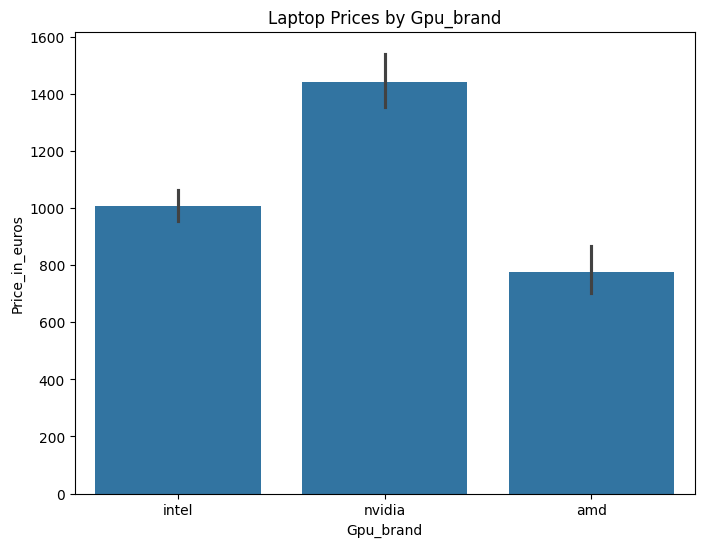

In [60]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Iterar sobre las variables categóricas y trazar la relación con la variable objetivo
for var in features_cat:
    plt.figure(figsize=(8, 6))
    plt.title(f'Laptop Prices by {var}')
    sns.barplot(x=var, y='Price_in_euros', data=df_clean_copy)
    plt.xlabel(var)
    plt.ylabel('Price_in_euros')
    plt.show()

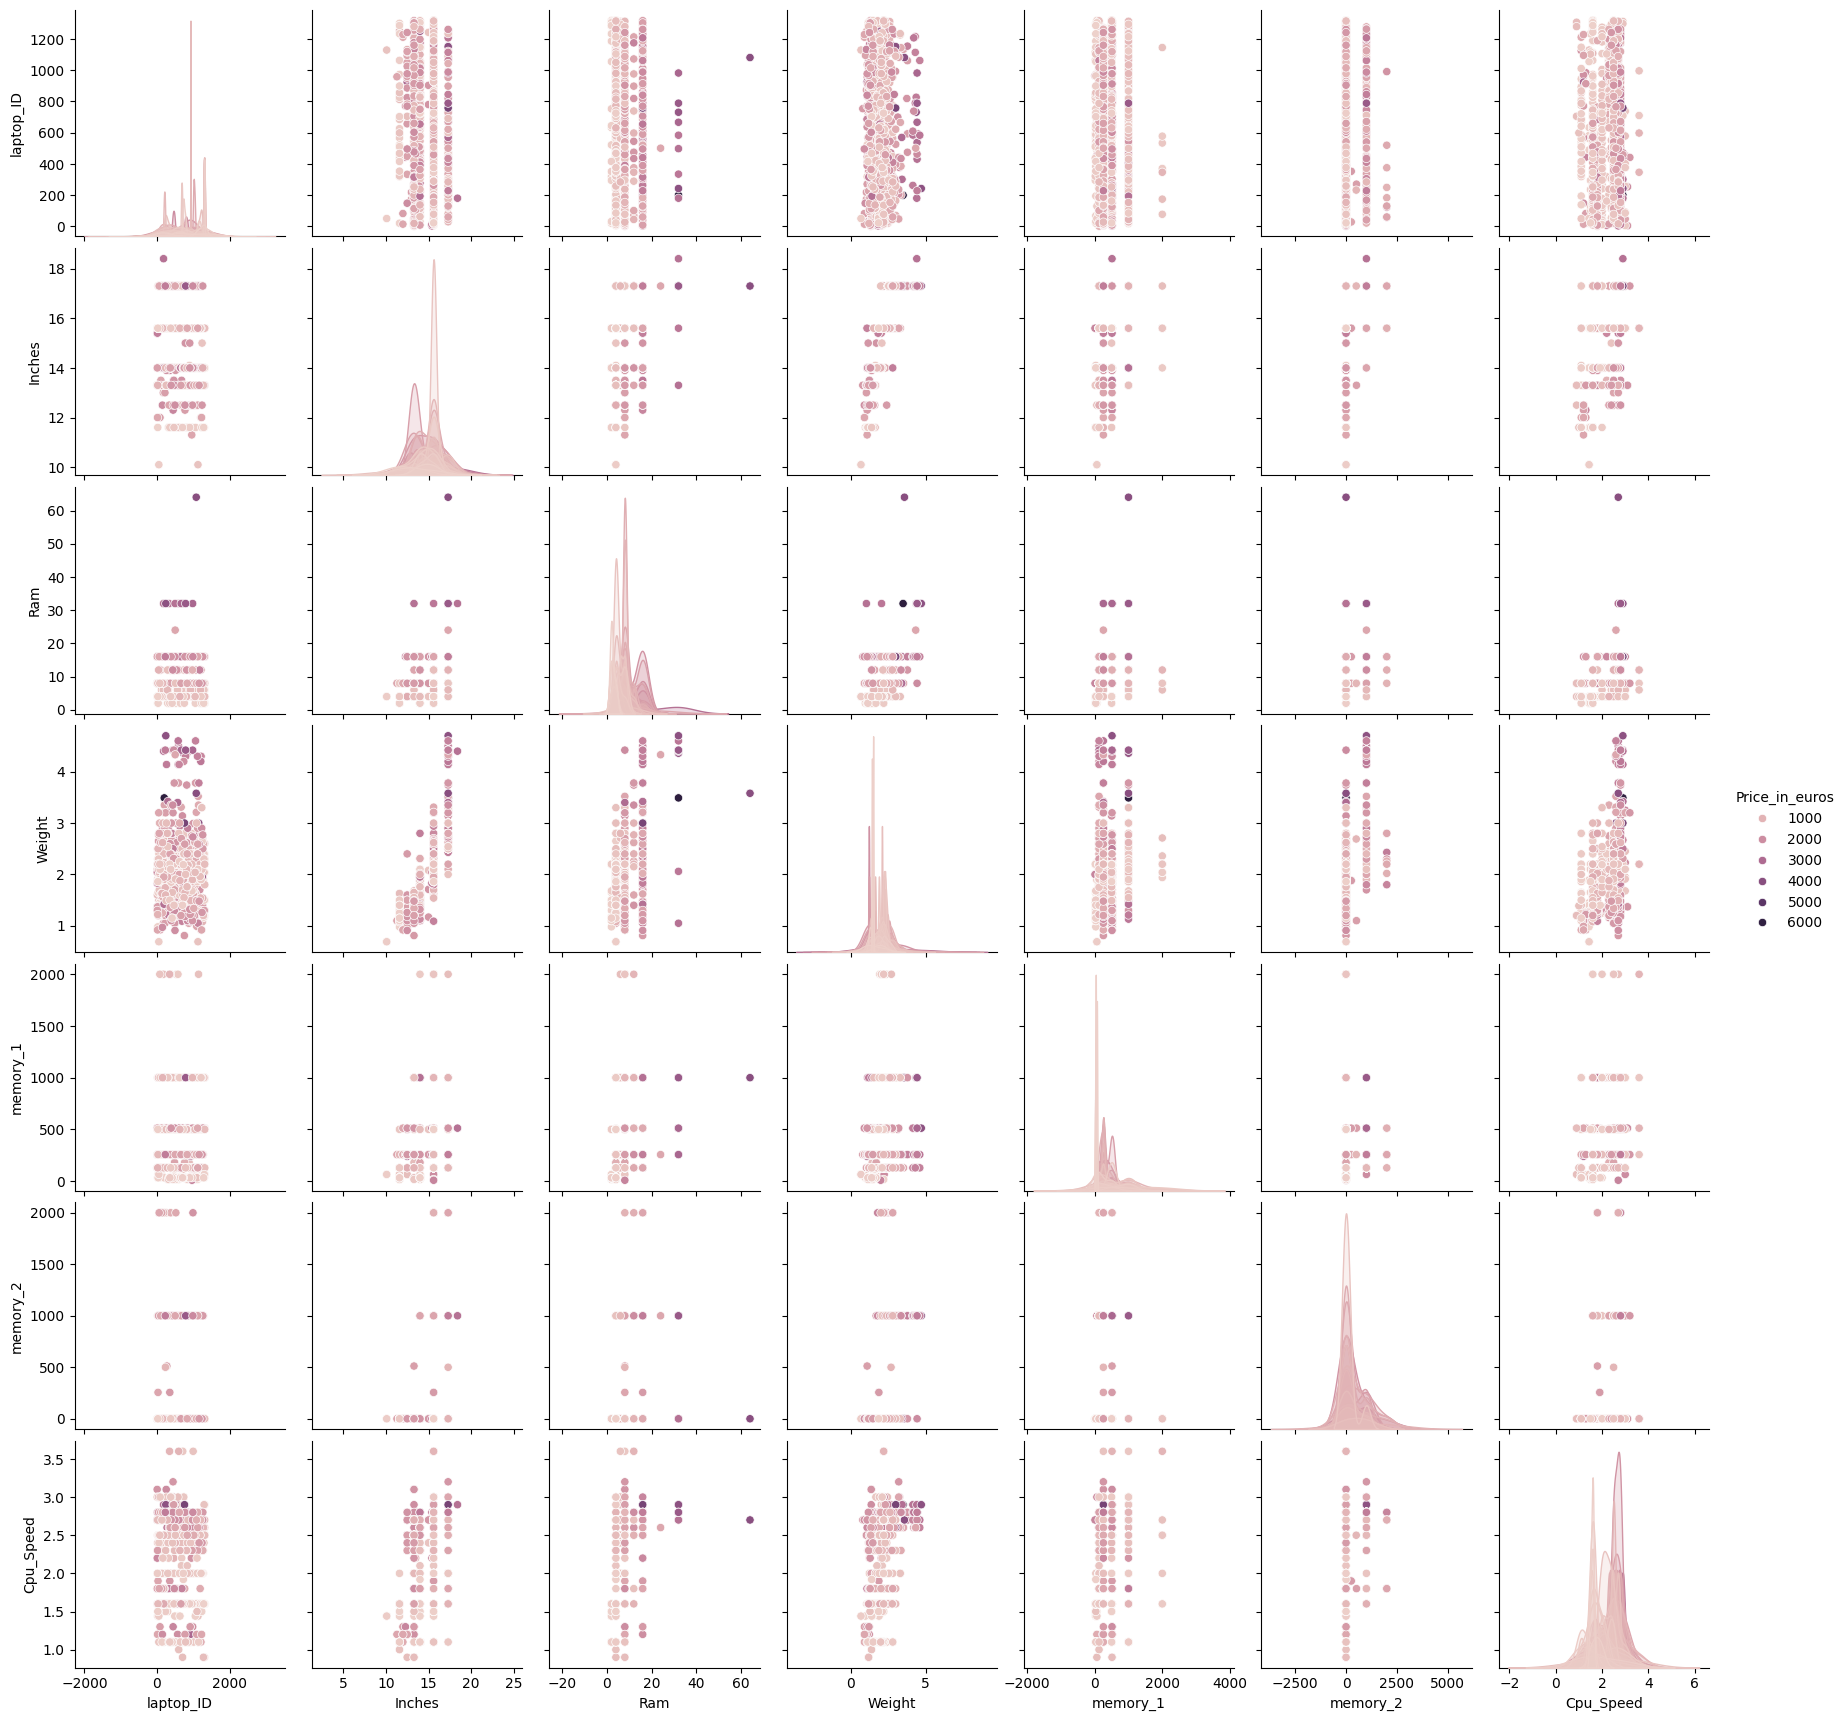

In [61]:
sns.pairplot(df_clean_copy[features_num + [target]], hue = target)

In [62]:
corr = df_clean_copy.corr(numeric_only= True)
np.abs(corr[target]).sort_values(ascending = False)

Price_in_euros    1.000000
Ram               0.738922
Cpu_Speed         0.427116
memory_2          0.295325
ips               0.267188
touchscreen       0.218089
Weight            0.197086
memory_1          0.089937
Inches            0.071043
laptop_ID         0.023643
Name: Price_in_euros, dtype: float64

In [63]:
features_cat_sel1 = ['ips','touchscreen','Company','Product','TypeName','OpSys','resolution','res_screen','memory_1_type','memory_2_type','Cpu_brand','Gpu_brand']

In [64]:
features_num_sel1 = [ 'Ram', 'Weight', 'memory_1', 'memory_2', 'Cpu_Speed']
features_num_sel2 = ['laptop_ID', 'Inches']
pobrecillas = []

In [65]:
features_num_sel1 = [ 'Ram', 'Weight', 'memory_1', 'memory_2', 'Cpu_Speed']
features_cat_sel1 = ['ips','touchscreen','Company','Product','TypeName','OpSys','resolution','res_screen','memory_1_type','memory_2_type','Cpu_brand','Gpu_brand']

# train/test

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definir el conjunto de características y el objetivo
X = df_clean_copy.drop(columns=[target])
y = df_clean_copy[target]
X.info()
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   laptop_ID      912 non-null    int64  
 1   Company        912 non-null    object 
 2   Product        912 non-null    object 
 3   TypeName       912 non-null    object 
 4   Inches         912 non-null    float64
 5   Ram            912 non-null    int32  
 6   OpSys          912 non-null    object 
 7   Weight         912 non-null    float64
 8   ips            912 non-null    bool   
 9   touchscreen    912 non-null    bool   
 10  resolution     912 non-null    object 
 11  res_screen     912 non-null    object 
 12  memory_1       912 non-null    int32  
 13  memory_2       912 non-null    int32  
 14  memory_1_type  912 non-null    object 
 15  memory_2_type  912 non-null    object 
 16  Cpu_Speed      912 non-null    float64
 17  Cpu_brand      912 non-null    object 
 18  Gpu_brand 

# Tratamiento

## Numericas

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   laptop_ID      729 non-null    int64  
 1   Company        729 non-null    object 
 2   Product        729 non-null    object 
 3   TypeName       729 non-null    object 
 4   Inches         729 non-null    float64
 5   Ram            729 non-null    int32  
 6   OpSys          729 non-null    object 
 7   Weight         729 non-null    float64
 8   ips            729 non-null    bool   
 9   touchscreen    729 non-null    bool   
 10  resolution     729 non-null    object 
 11  res_screen     729 non-null    object 
 12  memory_1       729 non-null    int32  
 13  memory_2       729 non-null    int32  
 14  memory_1_type  729 non-null    object 
 15  memory_2_type  729 non-null    object 
 16  Cpu_Speed      729 non-null    float64
 17  Cpu_brand      729 non-null    object 
 18  Gpu_brand     

In [68]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 25 to 102
Series name: Price_in_euros
Non-Null Count  Dtype  
--------------  -----  
729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


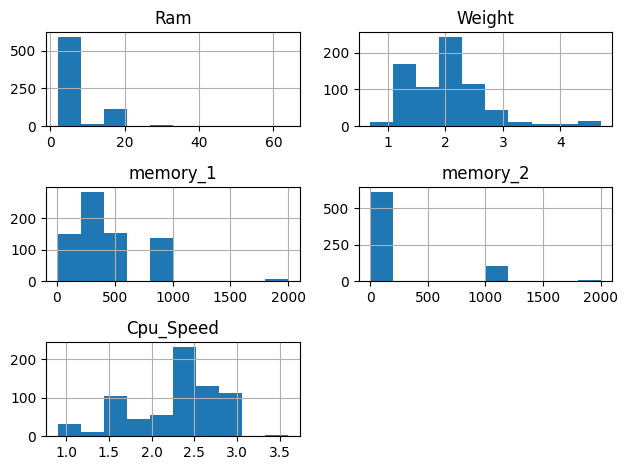

In [69]:
X_train[features_num_sel1].hist()
plt.tight_layout()

*No las normalizo, tampoco habria que escalar porque uso RandomForest pero lo hago por si uso otros modelos.*

In [70]:
# Aplicar log-normalización a las características numéricas
def apply_log_normalization(dataset, columns):
    for column in columns:
        dataset[column] = np.log(dataset[column] + 1)  # Agregar 1 para evitar log(0)
    return dataset

columns_num_to_normalize = ['Ram', 'memory_1']
X_train_normalized = apply_log_normalization(X_train.copy(), columns_num_to_normalize)
X_test_normalized = apply_log_normalization(X_test.copy(), columns_num_to_normalize)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normalized[features_num_sel1])
X_test_scaled = scaler.transform(X_test_normalized[features_num_sel1])

In [71]:
numo = X_train_scaled.shape[1]
numo

5

# Categoricas

In [72]:
# Codificar las características categóricas

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train_normalized[features_cat_sel1])
X_test_encoded = encoder.transform(X_test_normalized[features_cat_sel1])



C:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
nume = X_train_encoded.shape[1]
nume

471

In [74]:
print("Características únicas en X_train_encoded:", np.unique(X_train_encoded))


Características únicas en X_train_encoded: [0. 1.]


In [75]:
# Concatenar las características numéricas escaladas y codificadas con las características categóricas codificadas
X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

In [76]:
num_features = X_test_final.shape
print("Número de características en X_train_final:", num_features)

Número de características en X_train_final: (183, 476)


## APLICAR DESDE AQUI EL TOOLBOX II

# Funcion n°1
### eval_model

In [80]:
def eval_model(target, predictions, problem_type, metrics):
    """
    Evalúa un modelo de Machine Learning utilizando diferentes métricas especificadas por el usuario.

    Argumentos:
    target (tipo array): Valores reales del target.
    predictions (tipo array): Valores predichos por el modelo.
    problem_type (str): Tipo de problema, puede ser 'regression' o 'classification'.
    metrics (list): Lista de métricas a calcular y mostrar. Las métricas disponibles dependen del tipo de problema.
                     Para problemas de regresión: 'RMSE', 'MAE', 'MAPE', 'GRAPH'.
                     Para problemas de clasificación: 'ACCURACY', 'PRECISION', 'RECALL', 'CLASS_REPORT', 'MATRIX',
                                                        'MATRIX_RECALL', 'MATRIX_PRED', 'PRECISION_X', 'RECALL_X'.

    Returns:
    tuple: Una tupla con los valores de las métricas solicitadas en el orden especificado en la lista de métricas.
    """

    results = []

    #REGRESION
    if problem_type == 'regression':
        for metric in metrics:
            #Empezamos con RMSE
            if metric == 'RMSE':
                rmse = np.sqrt(mean_squared_error(target, predictions))
                print(f"RMSE: {rmse}")
                results.append(rmse)

            #Seguimos con MAE
            elif metric == 'MAE':
                mae = mean_absolute_error(target, predictions)
                print(f"MAE: {mae}")
                results.append(mae)

            #Seguimos con MAPE
            elif metric == 'MAPE':
                try:
                    mape = np.mean(np.abs((target - predictions) / target)) * 100
                    print(f"MAPE: {mape}")
                    results.append(mape)
                #Imprimir ValueError
                except ZeroDivisionError:
                    raise ValueError("No se puede calcular MAPE cuando hay valores de target iguales a cero.")
           
            #Seguimos con GRAPH
            elif metric == 'GRAPH':
                plt.figure(figsize=(8, 6))
                plt.scatter(target, predictions)
                plt.xlabel('Real')
                plt.ylabel('Predicción')
                plt.title('Gráfico de dispersión de Predicciones vs. Real')
                plt.show()
    
    #CLASIFICACION
    elif problem_type == 'classification':
        for metric in metrics:
            
            #Empezamos con ACCURACY
            if metric == 'ACCURACY':
                accuracy = accuracy_score(target, predictions)
                print(f"Accuracy: {accuracy}")
                results.append(accuracy)

            #Seguimos con PRECISION
            elif metric == 'PRECISION':
                precision = precision_score(target, predictions, average='macro')
                print(f"Precision: {precision}")
                results.append(precision)

            #Seguimos con RECALL
            elif metric == 'RECALL':
                recall = recall_score(target, predictions, average='macro')
                print(f"Recall: {recall}")
                results.append(recall)

            # Seguimos con CLASS_REPORT
            elif metric == 'CLASS_REPORT':
                print("Classification Report:")
                print(classification_report(target, predictions))

            # Seguimos con NEO, Perdon, con MATRIX (#Dadjoke)
            elif metric == 'MATRIX':
                print("Confusion Matrix (Absolute Values):")
                print(confusion_matrix(target, predictions))

            # Seguimos con MATRIX_RECALL
            elif metric == 'MATRIX_RECALL':
                disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target, predictions))
                disp.plot(normalize='true')
                plt.title('Confusion Matrix (Normalized by Recall)')
                plt.show()

             # Seguimos con MATRIX_PRED
            elif metric == 'MATRIX_PRED':
                disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target, predictions))
                disp.plot(normalize='pred')
                plt.title('Confusion Matrix (Normalized by Prediction)')
                plt.show()

            elif 'PRECISION_' in metric:
                class_label = metric.split('_')[-1] # Obtener la etiqueta de clase de la métrica
                try:
                    precision_class = precision_score(target, predictions, labels=[class_label])
                    print(f"Precision for class {class_label}: {precision_class}")
                    results.append(precision_class)
                except ValueError:
                    raise ValueError(f"La clase {class_label} no está presente en las predicciones.")
            elif 'RECALL_' in metric:
                class_label = metric.split('_')[-1]
                try:
                    recall_class = recall_score(target, predictions, labels=[class_label])
                    print(f"Recall for class {class_label}: {recall_class}")
                    results.append(recall_class)
                except ValueError:
                    raise ValueError(f"La clase {class_label} no está presente en las predicciones.")
    else:
        raise ValueError("El tipo de problema debe ser 'regression' o 'classification'.")

    return tuple(results)

RMSE: 369.01928790413547
MAE: 213.30918329213287


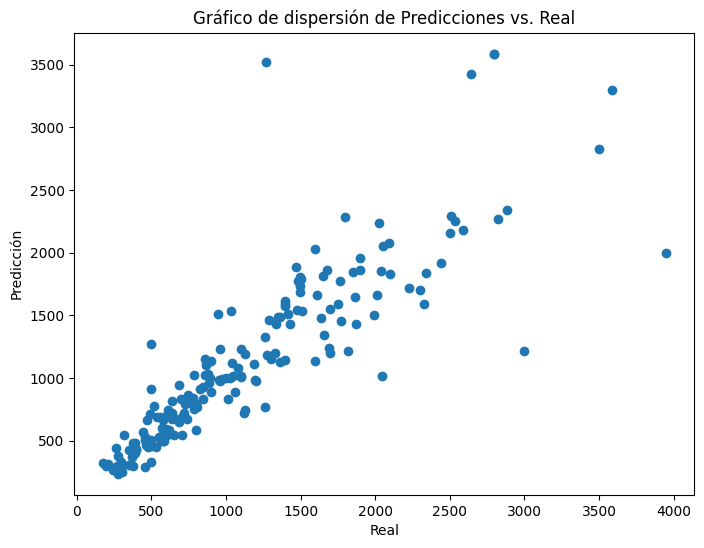

(369.01928790413547, 213.30918329213287)

In [84]:
# Entrenar un modelo de regresión 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_final, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_final)

# Evaluar el modelo utilizando la función eval_model
metrics = ["RMSE", "MAE", "GRAPH", "ACCURACY", "PRECISION", "RECALL", "CLASS_REPORT", "MATRIX", "MATRIX_RECALL", "MATRIX_PRED"]
eval_model(y_test, predictions, problem_type="regression", metrics=metrics)

-> sin GridSearchCV -> RMSE de 369